In [2]:
# File: reports_prediction_test.py.ipynb
# Author: victo
# Copyright: 2024, Smart Cities Peru.
# License: MIT
#
# Purpose:
# This is the entry point for the application.
#
# Last Modified: 2024-05-11

import fpdf
from fpdf import FPDF
import time
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi


In [13]:
# Lee el conjunto de datos desde el directorio 'data'
df = pd.read_excel("../data/Melsol-test.xlsx")
df.head()

,MES,PRODUCTOS ALMACENADOS,GASTO DE MARKETING,GASTO DE ALMACENAMIENTO,DEMANDA DEL PRODUCTO,FESTIVIDAD,PRECIO DE VENTA,PRODUCTOS VENDIDOS
0,1,4,0.4,1.71,1,0,10.0,1
1,2,3,0.4,1.71,1,1,10.6,0
2,3,3,0.4,0.57,1,0,10.6,2
3,4,1,0.4,0.57,1,1,10.6,0
4,5,13,0.4,6.27,1,1,10.0,2


In [29]:
import pandas as pd

# Función para establecer el color de fondo en función del valor de la columna 'PRODUCTOS VENDIDOS'
def color_products_sold(value):
    if value > 10:
        color = 'background-color: #11F248; color: black'  # Verde oscuro para valores altos
    elif value > 5:
        color = 'background-color: #8AF211; color: black'  # Verde claro para valores medianos
    else:
        color = 'background-color: #C4F423; color: black'  # Amarillo para valores bajos
    return color

# Eliminar la columna del índice del DataFrame original
df = df.reset_index(drop=True)

# Aplicar estilo a la columna 'PRODUCTOS VENDIDOS' con barras
styled_df = df.style.bar(subset=['PRODUCTOS VENDIDOS'], color="#4167E1")

# Agregar estilo condicional a la columna 'PRODUCTOS ALMACENADOS'
styled_df = styled_df.applymap(color_products_sold, subset=['PRODUCTOS ALMACENADOS'])

# Aplicar estilo adicional para bordes
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('border', '1px solid black'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('border', '1px solid black')]
}])

# Mostrar el DataFrame con estilos
styled_df


C:\Users\victo\AppData\Local\Temp\ipykernel_19540\1064524932.py:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = styled_df.applymap(color_products_sold, subset=['PRODUCTOS ALMACENADOS'])


,MES,PRODUCTOS ALMACENADOS,GASTO DE MARKETING,GASTO DE ALMACENAMIENTO,DEMANDA DEL PRODUCTO,FESTIVIDAD,PRECIO DE VENTA,PRODUCTOS VENDIDOS
0,1,4,0.400000,1.710000,1,0,10.000000,1
1,2,3,0.400000,1.710000,1,1,10.600000,0
2,3,3,0.400000,0.570000,1,0,10.600000,2
3,4,1,0.400000,0.570000,1,1,10.600000,0
4,5,13,0.400000,6.270000,1,1,10.000000,2
5,6,11,0.400000,4.560000,1,0,10.600000,3
6,7,8,0.400000,3.990000,1,1,10.600000,1
7,8,7,0.400000,1.710000,1,0,10.600000,4
8,9,39,0.400000,18.240000,2,0,10.000000,7
9,10,68,0.400000,21.090000,7,0,10.600000,31


In [26]:
# Exportar DataFrame con estilo como una imagen
dfi.export(styled_df, '../images/df_con_predicciones.png')

In [54]:
import matplotlib.pyplot as plt

def generate_matplotlib_line_chart(df, filename):
    # Define paleta de colores para festividad
    festividad_palette = {0: '#EB2D53', 1: '#2B21EB'}
    # Create subplot and plot
    fig, ax = plt.subplots()
    for festividad, data in df.groupby('FESTIVIDAD'):
        ax.plot(data.index, data['PRODUCTOS VENDIDOS'], label='Festividad: {}'.format("No" if festividad == 0 else "Sí"),
                color=festividad_palette[festividad])
    
    # Set Title
    ax.set_title('Productos vendidos por Mes', fontweight="bold")
    
    # Set xlabel and ylabel
    ax.set_xlabel('Mes')
    ax.set_ylabel('Productos vendidos')
    
    # Set xticks to be the index of the dataframe
    ax.set_xticks(df.index)
    # Set xticklabels to be the months
    ax.set_xticklabels(df['MES'])
    
    # Add legend
    ax.legend()
    
    # Save the plot as a PNG
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    
    plt.show()

def generate_matplotlib_scatter_plot(df, filename):
    # Define color
    color = '#00E0B7'  # Color personalizado
    
    # Create scatter plot
    fig, ax = plt.subplots()
    ax.scatter(df['PRODUCTOS ALMACENADOS'], df['PRODUCTOS VENDIDOS'], color=color, alpha=0.7)  # Utiliza el color personalizado y reduce la opacidad
    
    # Set Title
    ax.set_title('Productos almacenados vs productos vendidos', fontweight="bold")
    
    # Set xlabel and ylabel
    ax.set_xlabel('PRODUCTOS ALMACENADOS')
    ax.set_ylabel('PRODUCTOS VENDIDOS')
    
    # Save the plot as a PNG
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    
    plt.show()


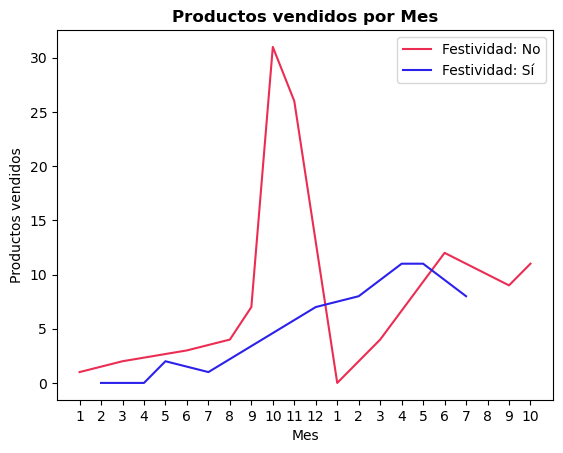

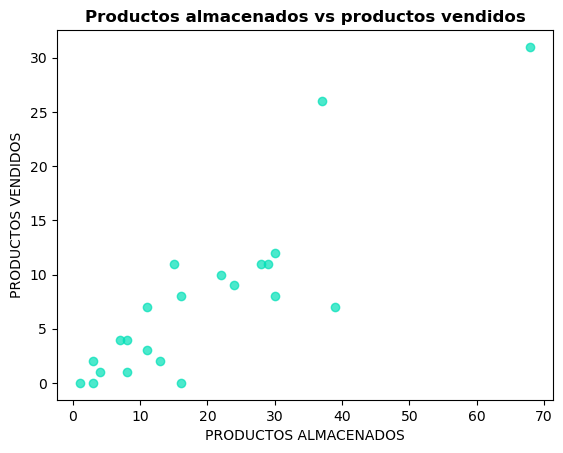

In [55]:
# Utilizando las funciones proporcionadas
generate_matplotlib_line_chart(df, '../images/productos_vendidos_por_mes_y_festividad.png')
generate_matplotlib_scatter_plot(df, '../images/dispersion_productos_almacenados_vs_vendidos.png')


In [56]:
def generate_matplotlib_scatter_plot(df, filename):
    # Create subplot
    fig, ax = plt.subplots()
    
    # Scatter plot
    ax.scatter(df['PRODUCTOS ALMACENADOS'], df['PRODUCTOS VENDIDOS'], color="#F4A261", alpha=0.8)
    
    # Set Title
    ax.set_title('Gráfico de Dispersión: Productos Vendidos vs Productos Almacenados', fontweight="bold")
    
    # Set xlabel
    ax.set_xlabel('Productos Almacenados') 
    
    # Set ylabel
    ax.set_ylabel('Productos Que Se Venderán') 
    
    # Save the plot as a PNG
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    
    plt.show()

def generate_profit_plot(df, filename):
    # Calculate profit
    df['Ganancias'] = df['PRODUCTOS VENDIDOS'] * df['PRECIO DE VENTA'] - (df['GASTO DE MARKETING'] + df['GASTO DE ALMACENAMIENTO'])
    
    # Create subplot
    fig, ax = plt.subplots()
    
    # Bar plot
    ax.bar(df.index, df['Ganancias'], color="#FF5733", label='Ganancias')  # Gráfico de barras para ganancias
    
    # Line plot for better visualization of profit trend
    ax.plot(df.index, df['Ganancias'], color="#0066FF", marker='o', linestyle='-', linewidth=2, label='Ganancias (Tendencia)')  # Gráfico de línea para tendencia de ganancias
    
    # Set Title
    ax.set_title('Gráfico de Ganancias por Mes', fontweight="bold")
    
    # Set xlabel
    ax.set_xlabel('MES')
    
    # Set xticks to be the index of the dataframe
    ax.set_xticks(df.index)
    # Set xticklabels to be the months
    ax.set_xticklabels(df['MES'])
    
    # Set ylabel
    ax.set_ylabel('Ganancias ($)') 
    
    # Add legend
    ax.legend()
    
    # Save the plot as a PNG
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    
    plt.show()


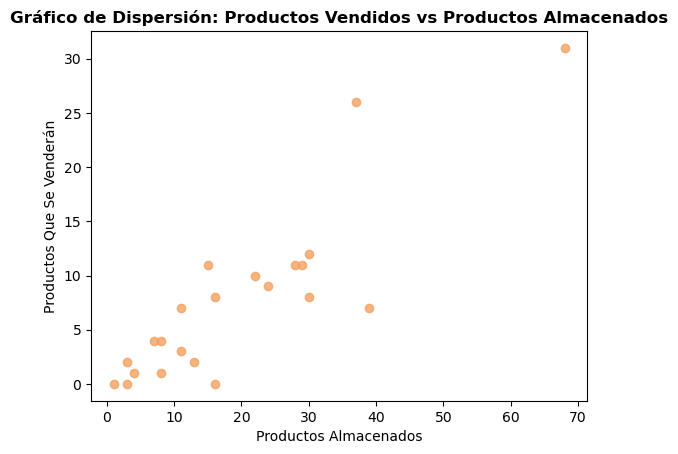

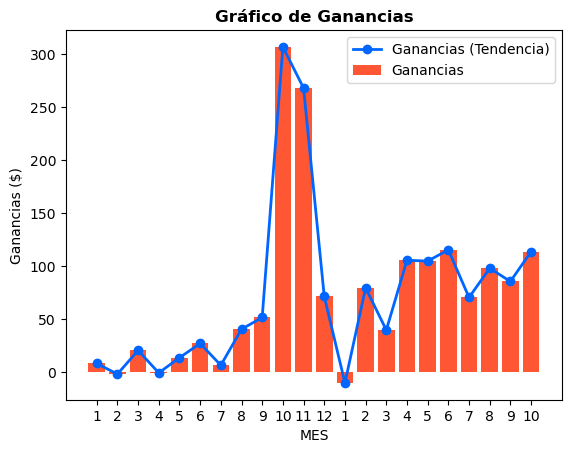

In [57]:
generate_matplotlib_scatter_plot(df, '../images/dispersion_productos_vendidos_vs_almacenados.png')
generate_profit_plot(df, '../images/ganancias_mensuales.png')
